### **Uczenie Maszynowe, Laboratoria 5 - Cross-Entropy**
### - funkcja wyboru sesji elitarnych, funkcja aktualizacji polityki, trening algorytmu wraz z wizualizacją oraz rendering efektu końcowego CEM dla Taxi-v3



---


*Aut. skryptu: Agnieszka Łysak, 12.04.2021*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(4, 3))

<Figure size 288x216 with 0 Axes>

<Figure size 288x216 with 0 Axes>

In [2]:
import gym

env = gym.make("Taxi-v3").env
env.reset()
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [3]:
env.action_space

Discrete(6)

In [4]:
env.observation_space

Discrete(500)

In [5]:
env.P

{0: {0: [(1.0, 100, -1, False)],
  1: [(1.0, 0, -1, False)],
  2: [(1.0, 20, -1, False)],
  3: [(1.0, 0, -1, False)],
  4: [(1.0, 16, -1, False)],
  5: [(1.0, 0, -10, False)]},
 1: {0: [(1.0, 101, -1, False)],
  1: [(1.0, 1, -1, False)],
  2: [(1.0, 21, -1, False)],
  3: [(1.0, 1, -1, False)],
  4: [(1.0, 17, -1, False)],
  5: [(1.0, 1, -10, False)]},
 2: {0: [(1.0, 102, -1, False)],
  1: [(1.0, 2, -1, False)],
  2: [(1.0, 22, -1, False)],
  3: [(1.0, 2, -1, False)],
  4: [(1.0, 18, -1, False)],
  5: [(1.0, 2, -10, False)]},
 3: {0: [(1.0, 103, -1, False)],
  1: [(1.0, 3, -1, False)],
  2: [(1.0, 23, -1, False)],
  3: [(1.0, 3, -1, False)],
  4: [(1.0, 19, -1, False)],
  5: [(1.0, 3, -10, False)]},
 4: {0: [(1.0, 104, -1, False)],
  1: [(1.0, 4, -1, False)],
  2: [(1.0, 24, -1, False)],
  3: [(1.0, 4, -1, False)],
  4: [(1.0, 4, -10, False)],
  5: [(1.0, 4, -10, False)]},
 5: {0: [(1.0, 105, -1, False)],
  1: [(1.0, 5, -1, False)],
  2: [(1.0, 25, -1, False)],
  3: [(1.0, 5, -1, False)

In [6]:
for t in range(200):
  action = env.action_space.sample()
  observation, reward, done, info = env.step(action)
  print(t, observation, reward, done)

0 267 -1 False
1 287 -1 False
2 287 -1 False
3 287 -10 False
4 287 -1 False
5 187 -1 False
6 167 -1 False
7 67 -1 False
8 87 -1 False
9 187 -1 False
10 187 -10 False
11 187 -1 False
12 287 -1 False
13 287 -1 False
14 267 -1 False
15 267 -10 False
16 267 -10 False
17 367 -1 False
18 367 -1 False
19 267 -1 False
20 267 -10 False
21 247 -1 False
22 227 -1 False
23 247 -1 False
24 247 -10 False
25 247 -10 False
26 147 -1 False
27 147 -10 False
28 247 -1 False
29 147 -1 False
30 147 -1 False
31 147 -10 False
32 47 -1 False
33 47 -10 False
34 67 -1 False
35 67 -10 False
36 67 -10 False
37 87 -1 False
38 187 -1 False
39 167 -1 False
40 187 -1 False
41 87 -1 False
42 87 -10 False
43 87 -10 False
44 187 -1 False
45 87 -1 False
46 187 -1 False
47 187 -10 False
48 87 -1 False
49 99 -1 False
50 99 -1 False
51 99 -1 False
52 99 -1 False
53 79 -1 False
54 59 -1 False
55 59 -10 False
56 59 -1 False
57 59 -1 False
58 159 -1 False
59 259 -1 False
60 359 -1 False
61 359 -10 False
62 339 -1 False
63 339 

In [7]:
for t in range(199):
  action = env.action_space.sample()
  observation, reward, done, info = env.step(action)
  env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : 

In [8]:
n_states = env.observation_space.n
n_actions = env.action_space.n

In [9]:
def initialize_policy(n_states, n_actions):
  
    policy = np.zeros(shape=(n_states, n_actions)) +  1/n_actions
    
    return policy

policy = initialize_policy(n_states, n_actions)

In [10]:
policy.shape

(500, 6)

In [11]:
total_reward = 0.
observation = env.reset()

for t in range(200):

  action = np.random.choice(n_actions, p = [1./n_actions, 1./n_actions, 1./n_actions, 1./n_actions, 1./n_actions, 1./n_actions])
  
  new_observation, reward, done, info = env.step(action)

  total_reward += reward
  
  if done:
    break

  print(t, total_reward, done)
  env.render()

0 -1.0 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
1 -2.0 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
2 -12.0 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
3 -13.0 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
4 -23.0 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
5 -33.0 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
6 -43.0 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
7 -44.0 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
8 -45.0 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
9 -46.0 False
+---------+
|R

In [12]:
def generate_session(env, policy, t_max = 5000):
  
  observations, actions = [], []
  total_reward = 0.
  observation = env.reset()
  
  for t in range(t_max):
    
    action = np.random.choice(n_actions, p = policy[observation])

    new_observation, reward, done, info = env.step(action)

    observations.append(observation)
    actions.append(action)
    total_reward += reward

    observation = new_observation
    if done:
        break

  return observations, actions, total_reward

In [13]:
observations, actions, total_reward = generate_session(env, policy)
print(len(observations), len(actions), total_reward)
print(observations)
print(actions)
print(total_reward)
env.render()

657 657 -2445.0
[107, 107, 107, 7, 7, 107, 207, 227, 227, 247, 247, 267, 167, 67, 87, 87, 87, 187, 87, 87, 67, 67, 67, 67, 67, 47, 147, 147, 147, 167, 67, 67, 67, 67, 67, 87, 87, 187, 187, 187, 287, 287, 387, 387, 387, 387, 367, 267, 287, 387, 367, 467, 467, 467, 467, 467, 487, 387, 367, 367, 367, 367, 267, 267, 167, 147, 247, 247, 147, 147, 147, 47, 147, 47, 47, 47, 67, 67, 67, 167, 67, 67, 67, 87, 87, 87, 99, 99, 99, 99, 87, 87, 87, 87, 87, 67, 67, 167, 267, 247, 147, 147, 247, 267, 287, 387, 387, 387, 487, 487, 487, 487, 467, 467, 467, 467, 467, 467, 487, 487, 467, 367, 367, 367, 367, 467, 467, 367, 267, 287, 287, 287, 287, 287, 287, 187, 287, 287, 187, 167, 67, 67, 167, 147, 247, 347, 347, 247, 247, 247, 267, 367, 367, 367, 267, 287, 287, 267, 267, 267, 167, 167, 187, 87, 87, 87, 187, 187, 287, 287, 287, 387, 367, 367, 467, 467, 467, 467, 467, 467, 467, 467, 367, 467, 467, 467, 467, 367, 387, 487, 487, 487, 387, 487, 487, 487, 387, 487, 467, 487, 487, 387, 367, 267, 267, 247, 247, 

In [16]:
def select_elites(observations_batch, actions_batch, total_reward_batch, percentile):

    reward_threshold = np.percentile(total_reward_batch, percentile)

    elite_observations = []
    elite_actions = []

    for i in range(len(total_reward_batch)):
      if total_reward_batch[i] >= reward_threshold:
        elite_observations += (observations_batch[i])
        elite_actions += (actions_batch[i])
        
    return elite_observations, elite_actions

In [17]:
sessions = [generate_session(env, policy) for i in range(3)]
observations_batch, actions_batch, total_reward_batch = zip(*sessions)

print(sessions)
print(observations_batch)
print(actions_batch)
print(total_reward_batch)

[([388, 388, 288, 288, 388, 488, 488, 488, 468, 488, 388, 368, 268, 368, 268, 168, 68, 68, 68, 88, 88, 88, 88, 188, 288, 268, 368, 388, 288, 388, 388, 388, 388, 388, 388, 368, 268, 168, 268, 268, 168, 148, 248, 248, 248, 148, 148, 248, 348, 348, 348, 328, 428, 428, 428, 428, 328, 328, 328, 328, 428, 428, 428, 428, 448, 448, 448, 428, 428, 428, 328, 348, 248, 248, 148, 148, 148, 168, 68, 88, 188, 188, 188, 188, 88, 88, 68, 68, 168, 68, 168, 168, 188, 288, 388, 388, 368, 268, 268, 368, 468, 368, 368, 268, 168, 168, 168, 188, 188, 188, 168, 168, 168, 268, 168, 168, 68, 68, 168, 168, 148, 48, 148, 48, 48, 48, 68, 168, 168, 168, 168, 168, 168, 268, 168, 168, 68, 48, 68, 68, 68, 88, 68, 48, 148, 148, 168, 168, 148, 248, 228, 248, 228, 208, 228, 208, 208, 208, 208, 228, 128, 128, 128, 128, 128, 28, 8, 8, 8, 108, 128, 108, 108, 208, 228, 208, 108, 108, 8, 8, 28, 28, 28, 28, 128, 128, 108, 108, 108, 108, 108, 108, 108, 208, 108, 208, 208, 228, 228, 248, 228, 228, 228, 208, 208, 208, 108, 108, 2

In [18]:
percentile = 80

elite_observations, elite_actions = select_elites(observations_batch, actions_batch, total_reward_batch, percentile)
print(elite_observations)
print(elite_actions)
print(len(elite_observations))
print(len(elite_actions))

[224, 324, 324, 424, 324, 324, 344, 244, 224, 224, 244, 344, 344, 344, 344, 324, 324, 344, 344, 344, 324, 424, 424, 424, 444, 444, 444, 424, 424, 444, 424, 424, 424, 424, 444, 344, 444, 444, 424, 444, 444, 444, 444, 424, 324, 324, 424, 444, 444, 344, 244, 344, 344, 324, 424, 424, 424, 324, 224, 324, 224, 224, 124, 24, 24, 24, 4, 4, 104, 124, 124, 124, 224, 224, 244, 144, 144, 164, 264, 264, 164, 184, 84, 64, 64, 64, 84, 64, 84, 184, 164, 164, 264, 284, 264, 244, 224, 224, 224, 204, 204, 104, 204, 224, 204, 104, 4, 4, 4, 104, 104, 204, 304, 204, 304, 204, 204, 204, 104, 104, 104, 104, 104, 104, 104, 104, 104, 124, 124, 24, 24, 124, 124, 124, 224, 224, 224, 224, 244, 344, 344, 444, 424, 424, 424, 444, 444, 444, 444, 444, 444, 444, 444, 444, 424, 324, 424, 424, 424, 424, 424, 424, 324, 424, 424, 424, 424, 424, 424, 424, 424, 444, 424, 424, 424, 324, 344, 344, 324, 224, 324, 424, 324, 424, 324, 324, 424, 444, 444, 344, 344, 344, 324, 324, 324, 324, 424, 424, 424, 424, 424, 324, 324, 224, 3

In [20]:
def update_policy(elite_observations, elite_actions):

    policy_updated = policy

    elite_observations_unique = set(elite_observations)
    
    actions_count = {observation:[0] * n_actions for observation in elite_observations_unique}

    for observation, action in zip(elite_observations, elite_actions):
        actions_count[observation][action] += 1
        
        #print(observation, action)
        #print(actions_count)
        
    for observation in elite_observations_unique:
        policy_updated[observation] = np.array(actions_count[observation]) / np.sum(actions_count[observation])

    return policy_updated

In [21]:
elite_observations_unique = set(elite_observations)
print(elite_observations)
print(len(elite_observations))
print(elite_observations_unique)
print(len(elite_observations_unique))

[224, 324, 324, 424, 324, 324, 344, 244, 224, 224, 244, 344, 344, 344, 344, 324, 324, 344, 344, 344, 324, 424, 424, 424, 444, 444, 444, 424, 424, 444, 424, 424, 424, 424, 444, 344, 444, 444, 424, 444, 444, 444, 444, 424, 324, 324, 424, 444, 444, 344, 244, 344, 344, 324, 424, 424, 424, 324, 224, 324, 224, 224, 124, 24, 24, 24, 4, 4, 104, 124, 124, 124, 224, 224, 244, 144, 144, 164, 264, 264, 164, 184, 84, 64, 64, 64, 84, 64, 84, 184, 164, 164, 264, 284, 264, 244, 224, 224, 224, 204, 204, 104, 204, 224, 204, 104, 4, 4, 4, 104, 104, 204, 304, 204, 304, 204, 204, 204, 104, 104, 104, 104, 104, 104, 104, 104, 104, 124, 124, 24, 24, 124, 124, 124, 224, 224, 224, 224, 244, 344, 344, 444, 424, 424, 424, 444, 444, 444, 444, 444, 444, 444, 444, 444, 424, 324, 424, 424, 424, 424, 424, 424, 324, 424, 424, 424, 424, 424, 424, 424, 424, 444, 424, 424, 424, 324, 344, 344, 324, 224, 324, 424, 324, 424, 324, 324, 424, 444, 444, 344, 344, 344, 324, 324, 324, 324, 424, 424, 424, 424, 424, 324, 324, 224, 3

In [22]:
actions_count = {observation:[0] * n_actions for observation in elite_observations_unique}
print(actions_count)
print(len(actions_count))

{4: [0, 0, 0, 0, 0, 0], 8: [0, 0, 0, 0, 0, 0], 16: [0, 0, 0, 0, 0, 0], 24: [0, 0, 0, 0, 0, 0], 28: [0, 0, 0, 0, 0, 0], 36: [0, 0, 0, 0, 0, 0], 44: [0, 0, 0, 0, 0, 0], 48: [0, 0, 0, 0, 0, 0], 56: [0, 0, 0, 0, 0, 0], 64: [0, 0, 0, 0, 0, 0], 68: [0, 0, 0, 0, 0, 0], 76: [0, 0, 0, 0, 0, 0], 84: [0, 0, 0, 0, 0, 0], 88: [0, 0, 0, 0, 0, 0], 96: [0, 0, 0, 0, 0, 0], 104: [0, 0, 0, 0, 0, 0], 108: [0, 0, 0, 0, 0, 0], 116: [0, 0, 0, 0, 0, 0], 124: [0, 0, 0, 0, 0, 0], 128: [0, 0, 0, 0, 0, 0], 136: [0, 0, 0, 0, 0, 0], 144: [0, 0, 0, 0, 0, 0], 148: [0, 0, 0, 0, 0, 0], 156: [0, 0, 0, 0, 0, 0], 164: [0, 0, 0, 0, 0, 0], 168: [0, 0, 0, 0, 0, 0], 172: [0, 0, 0, 0, 0, 0], 176: [0, 0, 0, 0, 0, 0], 184: [0, 0, 0, 0, 0, 0], 188: [0, 0, 0, 0, 0, 0], 192: [0, 0, 0, 0, 0, 0], 196: [0, 0, 0, 0, 0, 0], 204: [0, 0, 0, 0, 0, 0], 208: [0, 0, 0, 0, 0, 0], 216: [0, 0, 0, 0, 0, 0], 224: [0, 0, 0, 0, 0, 0], 228: [0, 0, 0, 0, 0, 0], 236: [0, 0, 0, 0, 0, 0], 244: [0, 0, 0, 0, 0, 0], 248: [0, 0, 0, 0, 0, 0], 256: [0, 0, 0, 0

In [23]:
for observation, action in zip(elite_observations, elite_actions):
  actions_count[observation][action] += 1

print(actions_count)
print(len(actions_count))
print(actions_count[observation])
print(np.sum(actions_count[observation]))

{4: [2, 2, 5, 2, 5, 0], 8: [9, 16, 16, 7, 11, 11], 16: [3, 2, 3, 1, 1, 1], 24: [7, 4, 10, 4, 4, 11], 28: [11, 18, 8, 13, 14, 17], 36: [5, 4, 5, 5, 5, 5], 44: [9, 2, 2, 2, 1, 7], 48: [8, 9, 4, 5, 6, 13], 56: [7, 3, 2, 0, 3, 4], 64: [0, 2, 4, 5, 2, 3], 68: [4, 2, 4, 8, 5, 3], 76: [5, 2, 1, 1, 1, 2], 84: [2, 2, 0, 6, 2, 1], 88: [4, 6, 5, 5, 8, 1], 96: [2, 3, 0, 2, 1, 1], 104: [11, 3, 3, 7, 9, 10], 108: [6, 12, 11, 10, 8, 15], 116: [2, 2, 4, 4, 2, 5], 124: [7, 6, 4, 6, 5, 3], 128: [7, 8, 10, 13, 4, 6], 136: [2, 7, 5, 4, 2, 6], 144: [7, 6, 6, 6, 8, 5], 148: [3, 4, 8, 4, 6, 9], 156: [4, 8, 3, 5, 4, 1], 164: [4, 1, 6, 3, 3, 7], 168: [3, 7, 3, 5, 8, 7], 172: [0, 0, 1, 0, 0, 1], 176: [3, 3, 6, 4, 6, 1], 184: [2, 5, 6, 5, 4, 5], 188: [6, 5, 4, 3, 5, 3], 192: [1, 0, 1, 0, 0, 0], 196: [6, 2, 3, 3, 1, 2], 204: [9, 9, 11, 11, 6, 6], 208: [2, 7, 6, 4, 10, 2], 216: [3, 1, 7, 4, 1, 2], 224: [15, 9, 13, 9, 15, 6], 228: [6, 6, 7, 7, 4, 5], 236: [8, 4, 6, 6, 6, 3], 244: [8, 7, 9, 10, 9, 7], 248: [5, 2, 5,

In [24]:
for observation, action in zip(elite_observations, elite_actions):
  actions_count[observation][action] += 1

print(actions_count[observation])
print(np.sum(actions_count[observation]))

[6, 4, 6, 2, 2, 2]
22


In [25]:
policy_updated = update_policy(elite_observations, elite_actions)

In [26]:
from IPython.display import clear_output

def show_progress(rewards_batch, log, percentile):

    mean_reward = np.mean(rewards_batch)
    threshold = np.percentile(rewards_batch, percentile)
    log.append([mean_reward, threshold])
    
    plt.figure(figsize=[8, 4])
    plt.plot(list(zip(*log))[0], label='Mean rewards')
    plt.plot(list(zip(*log))[1], label='Reward thresholds')
    plt.legend()
    plt.grid()

    clear_output(True)
    print("mean reward = ", mean_reward)
    print("treshold = ", threshold)
    plt.show()

In [27]:
policy = initialize_policy(n_states, n_actions)

mean reward =  5.11
treshold =  6.0


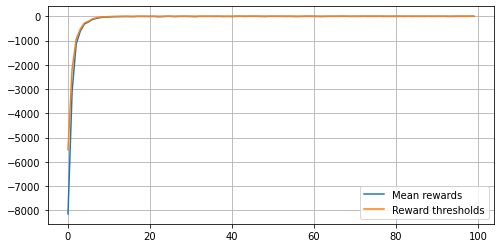

In [28]:
n_sessions = 100
percentile = 50
learning_rate = 0.5

log = []

for i in range(100):
  
    sessions = [generate_session(env, policy, t_max=5000) for j in range(n_sessions)]
    
    observations_batch, actions_batch, total_reward_batch = zip(*sessions)

    elite_observations, elite_actions = select_elites(observations_batch, actions_batch, total_reward_batch, percentile)

    policy_updated = update_policy(elite_observations, elite_actions)

    policy = learning_rate * policy_updated + (1 - learning_rate) * policy

    show_progress(total_reward_batch, log, percentile)

In [29]:
print(policy)

[[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 ...
 [0.09090909 0.45454545 0.         0.18181818 0.09090909 0.18181818]
 [0.         1.         0.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.        ]]


In [30]:
total_reward = 0.
observation = env.reset()

for t in range(200):

  action = np.random.choice(n_actions, p = policy[observation])
  
  new_observation, reward, done, info = env.step(action)

  observation = new_observation

  total_reward += reward
  
  if done:
    break

  print(t, total_reward, done)
  env.render()

0 -1.0 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
1 -2.0 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
|_| : | : |
|Y| : |B: |
+---------+
  (North)
2 -3.0 False
+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
3 -4.0 False
+---------+
|R: | : :G|
|_: | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
4 -5.0 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)


In [ ]:
# Źródła:
# [1] Yandex Data School, "Crossentropy Method", Github, https://github.com/yandexdataschool/Practical_RL/blob/master/week01_intro/crossentropy_method.ipynb